# Visualización de datos grillados

En este análisis, nos enfocaremos en la **visualización de campos meteorológicos provenientes de datos grillados** del reanálisis ERA5. El objetivo principal es observar y entender la evolución de un **ciclón atmosférico** desarrollado en la **costa de Perú**, utilizando variables clave para interpretar su dinámica y efectos.

## Variables analizadas:
- **Presión media al nivel del mar (MSLP)**: utilizada para identificar el centro de baja presión asociado al ciclón.
- **Vectores de viento a 10 metros**: permiten visualizar el patrón de circulación del sistema ciclónico.
- **Temperatura del aire a 2 metros**: útil para analizar los contrastes térmicos y posibles advecciones.
- **Precipitación total**: evidencia la distribución espacial de lluvias asociadas al evento.
- **Altura geopotencial a 850 hPa (Z850)**: proporciona información sobre la estructura y ondulación de los sistemas en niveles medios de la atmósfera, siendo clave para identificar vorticidad, advección de altura y soporte dinámico del ciclón.


El análisis se realizará durante el período comprendido **entre el 3 y el 12 de marzo de 2023**, con especial atención a las condiciones atmosféricas observadas a las **18:00 UTC** cada día, momento representativo del desarrollo y evolución del sistema ciclónico.

Estas visualizaciones permiten comprender mejor la estructura del sistema y la interacción entre variables meteorológicas durante un evento de alta relevancia sinóptica.


### Instalación de la librería `colormaps` del [NCAR](https://pratiman-91.github.io/colormaps/docs/collections/ncar_ncl)

Si no tienes instalada la librería `colormaps` del NCAR, puedes hacerlo activando tu ambiente virtual (si corresponde) y luego ejecutando el siguiente comando en la terminal:

```bash
pip install colormaps

## Importar librerias

In [1]:
import xarray as xr
import colormaps as cmaps
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter

## Leer datos de ERA5

In [2]:
filename = '../data/ERA5/ERA5_202303_MSLP.nc'
mlsp = xr.open_dataset(filename)/100
mlsp

<xarray.Dataset> Size: 325kB
Dimensions:     (valid_time: 9, latitude: 101, longitude: 89)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 72B 2023-03-04T18:00:00 ... 2023-...
  * latitude    (latitude) float64 808B 5.0 4.75 4.5 4.25 ... -19.5 -19.75 -20.0
  * longitude   (longitude) float64 712B -90.0 -89.75 -89.5 ... -68.25 -68.0
    expver      (valid_time) <U4 144B ...
Data variables:
    msl         (valid_time, latitude, longitude) float32 324kB 1.01e+03 ... ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-07T07:52 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
filename = '../data/ERA5/ERA5_202303_U10.nc'
U10 = xr.open_dataset(filename)
filename = '../data/ERA5/ERA5_202303_V10.nc'
V10 = xr.open_dataset(filename)
V10


<xarray.Dataset> Size: 325kB
Dimensions:     (valid_time: 9, latitude: 101, longitude: 89)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 72B 2023-03-04T18:00:00 ... 2023-...
  * latitude    (latitude) float64 808B 5.0 4.75 4.5 4.25 ... -19.5 -19.75 -20.0
  * longitude   (longitude) float64 712B -90.0 -89.75 -89.5 ... -68.25 -68.0
    expver      (valid_time) <U4 144B ...
Data variables:
    v10         (valid_time, latitude, longitude) float32 324kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-07T08:11 GRIB to CDM+CF via cfgrib-0.9.1...

## Análisis de presión y vectores de viento

In [4]:
# --- Define Mercator projection ---
proj = ccrs.Mercator()

Text(0.5, 1.0, '2023-03-11 18UTC')

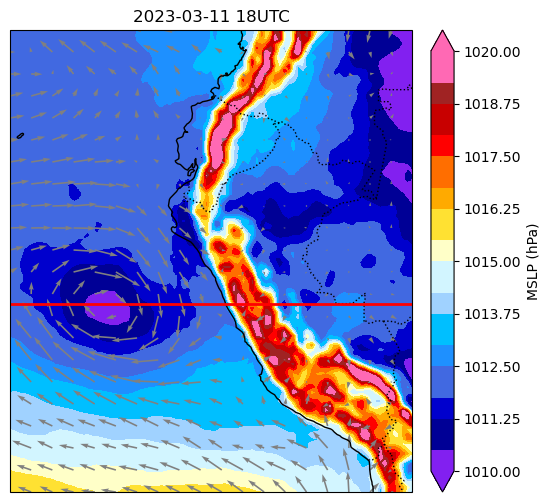

In [5]:
# --- Create figure and axes with Mercator projection ---
# Crea una figura y un eje con tamaño 12x6 pulgadas.
# El eje usa una proyección de mapa especificada en 'proj' (por ejemplo, ccrs.Mercator()).
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': proj})

# Dibuja las líneas de costa en el mapa con una resolución media (50m).
ax.coastlines(resolution='50m')

# Agrega fronteras nacionales al mapa con líneas punteadas.
ax.add_feature(cfeature.BORDERS, linestyle=':')

# --- Opcional: Definir los límites geográficos del mapa ---
# Define el área geográfica que se mostrará: longitud de -90° a -68°, latitud de -20° a 5°.
# Usa la proyección PlateCarree para interpretar correctamente las coordenadas.
ax.set_extent([-90, -68, -20, 5], crs=ccrs.PlateCarree())

# Define los niveles de contorno para el gráfico de presión (MSLP), de 1010 a 1030 hPa con paso de 0.5.
levels = np.arange(1010, 1020.1, 0.25)


# Dibuja un mapa de contornos rellenado (contourf) de la presión al nivel del mar (MSLP),
# usando el campo 'mlsp.msl[8]' para una fecha/hora específica (índice 8).
# El mapa se proyecta desde coordenadas lat/lon con PlateCarree.
time_sel = 7
mslp_plot = ax.contourf(
    mlsp.longitude, mlsp.latitude, mlsp.msl[time_sel],
    levels=levels,
    cmap=cmaps.amwg_blueyellowred,  # Colormap personalizado.
    extend="both",
    transform=ccrs.PlateCarree()
)

# Agrega una barra de colores vertical a la derecha del mapa, para indicar los valores de MSLP.
cbar = plt.colorbar(mslp_plot, ax=ax, orientation='vertical', pad=0.02, label="MSLP (hPa)")

# --- Dibujar vectores de viento (u, v) ---
# Define un paso para reducir la cantidad de flechas de viento, haciendo el gráfico más limpio.
step = 5

# Dibuja vectores de viento en el mapa usando los campos U10 (componente zonal) y V10 (meridional),
# tomando solo cada 5° punto para aligerar la visualización.
# Las flechas se dibujan en gris y escaladas para representar la dirección e intensidad del viento.
ax.quiver(
    U10.longitude[::step], U10.latitude[::step],
    U10.u10[time_sel][::step, ::step], V10.v10[time_sel][::step, ::step],
    transform=ccrs.PlateCarree(),   # Transforma coordenadas lon/lat al sistema de la proyección.
    regrid_shape=20,                # Interpolación espacial opcional (algunas versiones de Cartopy pueden ignorar).
    color='grey', width=0.0040, scale=100.0,  # Estética del vector de viento.
)

# Extract longitude array (or define it manually if needed)
lons = mlsp.longitude.values

# Define constant latitude array with same shape as longitude
lats = np.full_like(lons, -10.0)

# Plot the line in red across the full longitudinal extent
ax.plot(lons, lats, 'r', transform=ccrs.PlateCarree(), linewidth=2)

date_sel = pd.to_datetime(mlsp.valid_time[time_sel].values).strftime('%Y-%m-%d %H')
ax.set_title(f"{date_sel}UTC")

/tmp/ipykernel_42460/4076650766.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar para no sobreescribir la colorbar


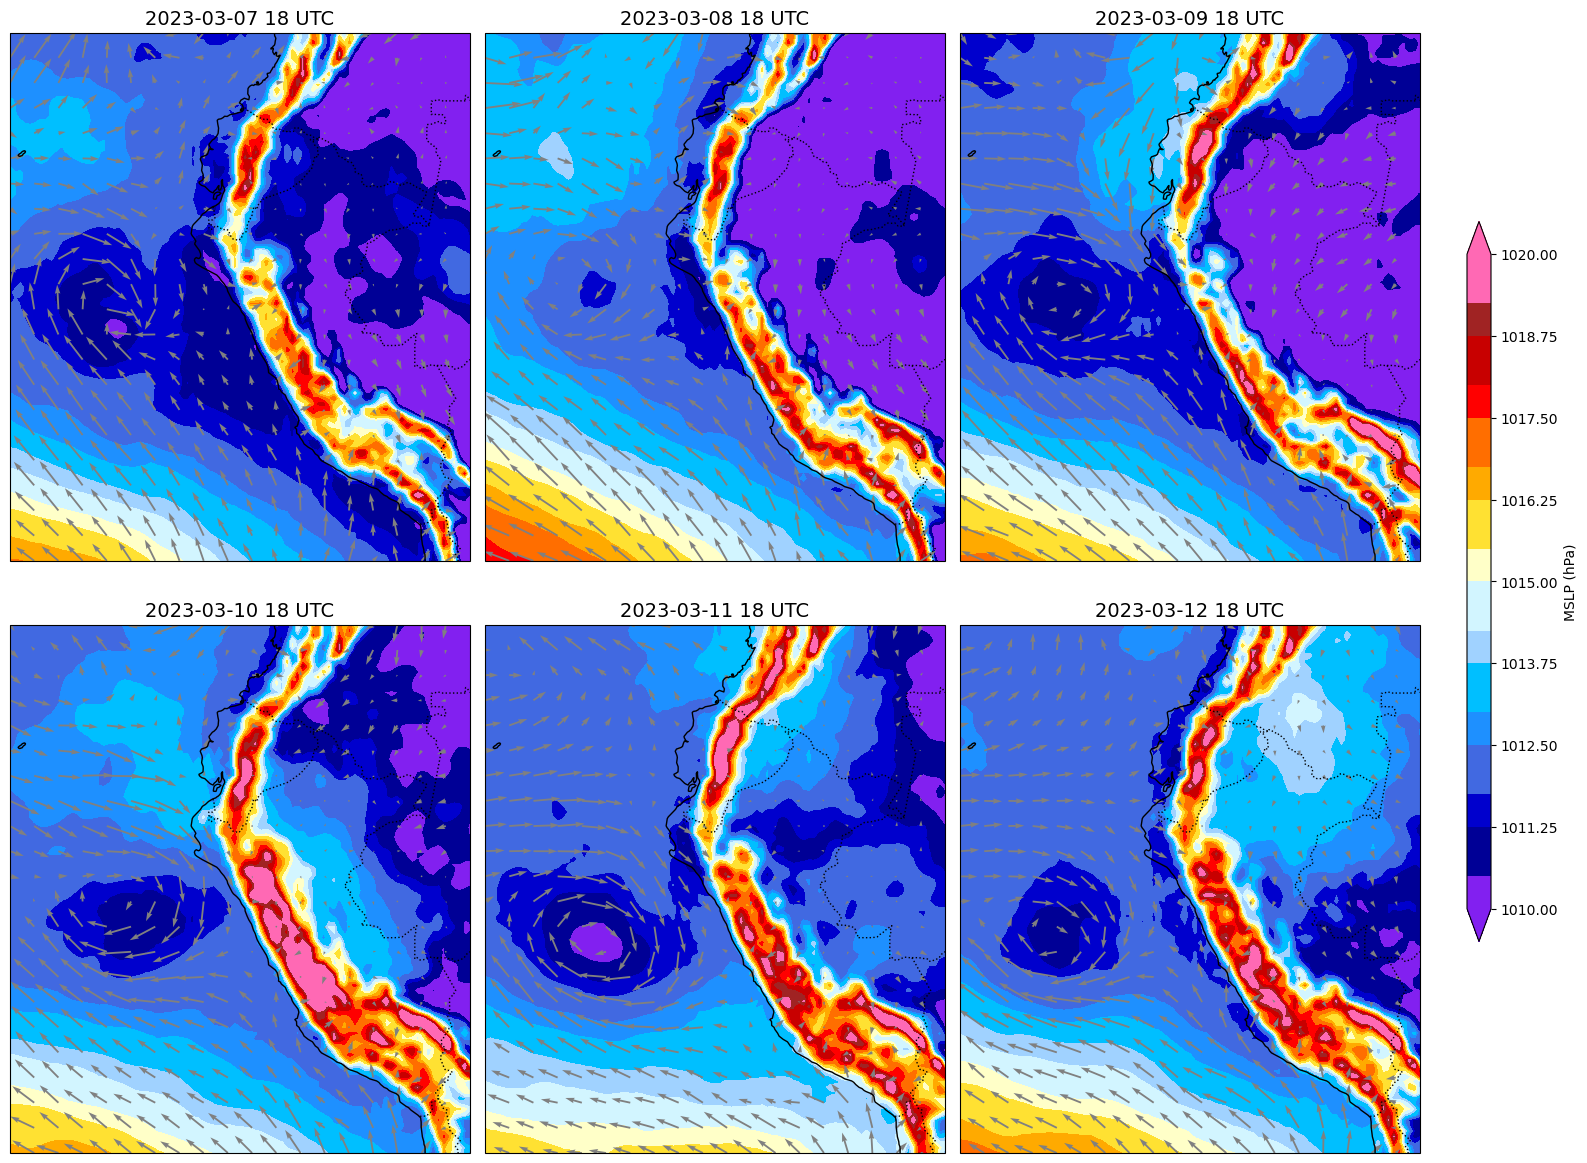

In [6]:
# --- Crear figura y ejes con 6 subplots (2 filas x 3 columnas) ---
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12), subplot_kw={'projection': proj})
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# --- Definir niveles de contorno para MSLP ---
levels = np.arange(1010, 1020.1, 0.25)

# --- Índices de tiempo a graficar ---
time_indices = [3, 4, 5, 6, 7, 8]

# --- Loop sobre los subplots ---
for i, time_sel in enumerate(time_indices):
    ax = axes[i]

    # Dibujar costas y fronteras
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Definir límites geográficos del mapa
    ax.set_extent([-90, -68, -20, 5], crs=ccrs.PlateCarree())

    # Dibujar mapa de contorno (MSLP)
    mslp_plot = ax.contourf(
        mlsp.longitude, mlsp.latitude, mlsp.msl[time_sel],
        levels=levels,
        cmap=cmaps.amwg_blueyellowred,
        extend="both",
        transform=ccrs.PlateCarree()
    )

    # Dibujar vectores de viento
    step = 5
    ax.quiver(
        U10.longitude[::step], U10.latitude[::step],
        U10.u10[time_sel][::step, ::step], V10.v10[time_sel][::step, ::step],
        transform=ccrs.PlateCarree(), regrid_shape=20,
        color='grey', width=0.0040, scale=100.0
    )

    # Título con la fecha
    date_sel = pd.to_datetime(mlsp.valid_time[time_sel].values).strftime('%Y-%m-%d %H')
    ax.set_title(f"{date_sel} UTC", fontsize=14)

# --- Agregar una sola barra de color para todos los subplots ---
# Usar el primer mapeo de contorno (mslp_plot) como referencia
cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])  # [left, bottom, width, height]
cbar = fig.colorbar(mslp_plot, cax=cbar_ax, orientation='vertical')
cbar.set_label("MSLP (hPa)")

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar para no sobreescribir la colorbar

fig.savefig(f"../fig/MLSP_202303.png", dpi = 300, facecolor='w', bbox_inches = 'tight', pad_inches = 0.1)

In [7]:
# Aplicar suavizado gaussiano al campo geopotencial
mlsp_smooth = xr.apply_ufunc(
    gaussian_filter,
    mlsp.msl,                        # Variable a suavizar
    kwargs={'sigma': 2},          # Sigma controla el nivel de suavizado (ajustable)
    input_core_dims=[["latitude", "longitude"]],
    output_core_dims=[["latitude", "longitude"]],
    vectorize=True
)

mlsp_smooth.name = "mlsp_smooth"
mlsp_smooth

<xarray.DataArray 'mlsp_smooth' (valid_time: 9, latitude: 101, longitude: 89)> Size: 324kB
array([[[1009.65204, 1009.66583, 1009.693  , ..., 1009.1316 ,
         1009.18445, 1009.2212 ],
        [1009.6394 , 1009.653  , 1009.67993, ..., 1009.0989 ,
         1009.1463 , 1009.17914],
        [1009.62445, 1009.6373 , 1009.6629 , ..., 1009.0377 ,
         1009.07275, 1009.0966 ],
        ...,
        [1014.7577 , 1014.75824, 1014.7587 , ..., 1009.4312 ,
         1008.81464, 1008.46857],
        [1014.90393, 1014.9034 , 1014.90186, ..., 1009.6992 ,
         1009.10925, 1008.76965],
        [1014.98535, 1014.9841 , 1014.98126, ..., 1009.8738 ,
         1009.3037 , 1008.97003]],

       [[1011.6651 , 1011.6117 , 1011.51074, ..., 1009.5476 ,
         1009.5174 , 1009.5061 ],
        [1011.6719 , 1011.62103, 1011.5252 , ..., 1009.54126,
         1009.5006 , 1009.48376],
        [1011.6818 , 1011.63617, 1011.5506 , ..., 1009.5246 ,
         1009.4627 , 1009.4343 ],
...
        [1015.6827 , 1015.6762 , 1015.66547, ..., 1015.42053,
         1014.849  , 1014.5091 ],
        [1015.7503 , 1015.745  , 1015.73645, ..., 1015.6101 ,
         1015.0894 , 1014.77014],
        [1015.7868 , 1015.7821 , 1015.7746 , ..., 1015.7168 ,
         1015.22363, 1014.91473]],

       [[1011.92993, 1011.9242 , 1011.9159 , ..., 1012.25195,
         1012.1947 , 1012.16724],
        [1011.94275, 1011.9356 , 1011.9248 , ..., 1012.27277,
         1012.2158 , 1012.1887 ],
        [1011.967  , 1011.9577 , 1011.9433 , ..., 1012.31213,
         1012.2554 , 1012.22864],
        ...,
        [1016.72864, 1016.71454, 1016.68756, ..., 1013.4477 ,
         1012.7038 , 1012.2884 ],
        [1016.813  , 1016.8008 , 1016.777  , ..., 1013.6328 ,
         1012.9126 , 1012.5012 ],
        [1016.85913, 1016.84814, 1016.82623, ..., 1013.7489 ,
         1013.044  , 1012.6351 ]]], shape=(9, 101, 89), dtype=float32)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 72B 2023-03-04T18:00:00 ... 2023-...
  * latitude    (latitude) float64 808B 5.0 4.75 4.5 4.25 ... -19.5 -19.75 -20.0
  * longitude   (longitude) float64 712B -90.0 -89.75 -89.5 ... -68.25 -68.0
    expver      (valid_time) <U4 144B ...

In [8]:
# Aplicar suavizado gaussiano al campo geopotencial
U10_smooth = xr.apply_ufunc(
    gaussian_filter,
    U10.u10,                        # Variable a suavizar
    kwargs={'sigma': 2},          # Sigma controla el nivel de suavizado (ajustable)
    input_core_dims=[["latitude", "longitude"]],
    output_core_dims=[["latitude", "longitude"]],
    vectorize=True
)

U10_smooth.name = "u10_smooth"

# Aplicar suavizado gaussiano al campo geopotencial
V10_smooth = xr.apply_ufunc(
    gaussian_filter,
    V10.v10,                        # Variable a suavizar
    kwargs={'sigma': 2},          # Sigma controla el nivel de suavizado (ajustable)
    input_core_dims=[["latitude", "longitude"]],
    output_core_dims=[["latitude", "longitude"]],
    vectorize=True
)

V10_smooth.name = "v10_smooth"
V10_smooth

<xarray.DataArray 'v10_smooth' (valid_time: 9, latitude: 101, longitude: 89)> Size: 324kB
array([[[ 0.46584302,  0.55650336,  0.7148192 , ..., -1.444528  ,
         -1.1081139 , -0.9076617 ],
        [ 0.624041  ,  0.69892126,  0.8281887 , ..., -1.4085579 ,
         -1.1079565 , -0.93210065],
        [ 0.8740398 ,  0.92840874,  1.0194311 , ..., -1.3407025 ,
         -1.0980175 , -0.9618365 ],
        ...,
        [ 4.5739183 ,  4.569945  ,  4.5633883 , ..., -0.24098375,
         -0.4944062 , -0.609058  ],
        [ 4.6320543 ,  4.6185756 ,  4.5951233 , ..., -0.10998397,
         -0.3502822 , -0.45438638],
        [ 4.670631  ,  4.6516395 ,  4.618175  , ..., -0.04238403,
         -0.27267092, -0.3690395 ]],

       [[-3.57624   , -3.7934113 , -4.030827  , ..., -0.33540806,
         -0.34173903, -0.3336836 ],
        [-3.6893327 , -3.8701324 , -4.045509  , ..., -0.31773186,
         -0.3380725 , -0.33894396],
        [-3.8222106 , -3.9442158 , -4.02079   , ..., -0.27678797,
         -0.3124331 , -0.3235351 ],
...
        [ 1.275057  ,  1.2800413 ,  1.2860667 , ...,  0.11249536,
          0.09714632,  0.13463254],
        [ 1.2724463 ,  1.2797054 ,  1.2887306 , ...,  0.1334831 ,
          0.0901401 ,  0.11102225],
        [ 1.2674582 ,  1.2762091 ,  1.2874526 , ...,  0.14382255,
          0.08505208,  0.09664483]],

       [[ 1.792032  ,  1.8292757 ,  1.8955289 , ..., -1.3825787 ,
         -1.2290379 , -1.1311742 ],
        [ 1.6976006 ,  1.7418201 ,  1.8200661 , ..., -1.2318345 ,
         -1.1026294 , -1.0209926 ],
        [ 1.5357347 ,  1.5925463 ,  1.6925037 , ..., -0.9894019 ,
         -0.89821476, -0.84222853],
        ...,
        [ 2.411226  ,  2.3435163 ,  2.2220004 , ...,  0.94925785,
          0.92126524,  0.9234356 ],
        [ 2.4148338 ,  2.3503196 ,  2.2344205 , ...,  0.97515017,
          0.9357684 ,  0.9315486 ],
        [ 2.4176862 ,  2.3565226 ,  2.2468596 , ...,  0.9862185 ,
          0.93906915,  0.9305452 ]]], shape=(9, 101, 89), dtype=float32)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 72B 2023-03-04T18:00:00 ... 2023-...
  * latitude    (latitude) float64 808B 5.0 4.75 4.5 4.25 ... -19.5 -19.75 -20.0
  * longitude   (longitude) float64 712B -90.0 -89.75 -89.5 ... -68.25 -68.0
    expver      (valid_time) <U4 144B ...

/tmp/ipykernel_42460/2605922515.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar para no sobreescribir la colorbar


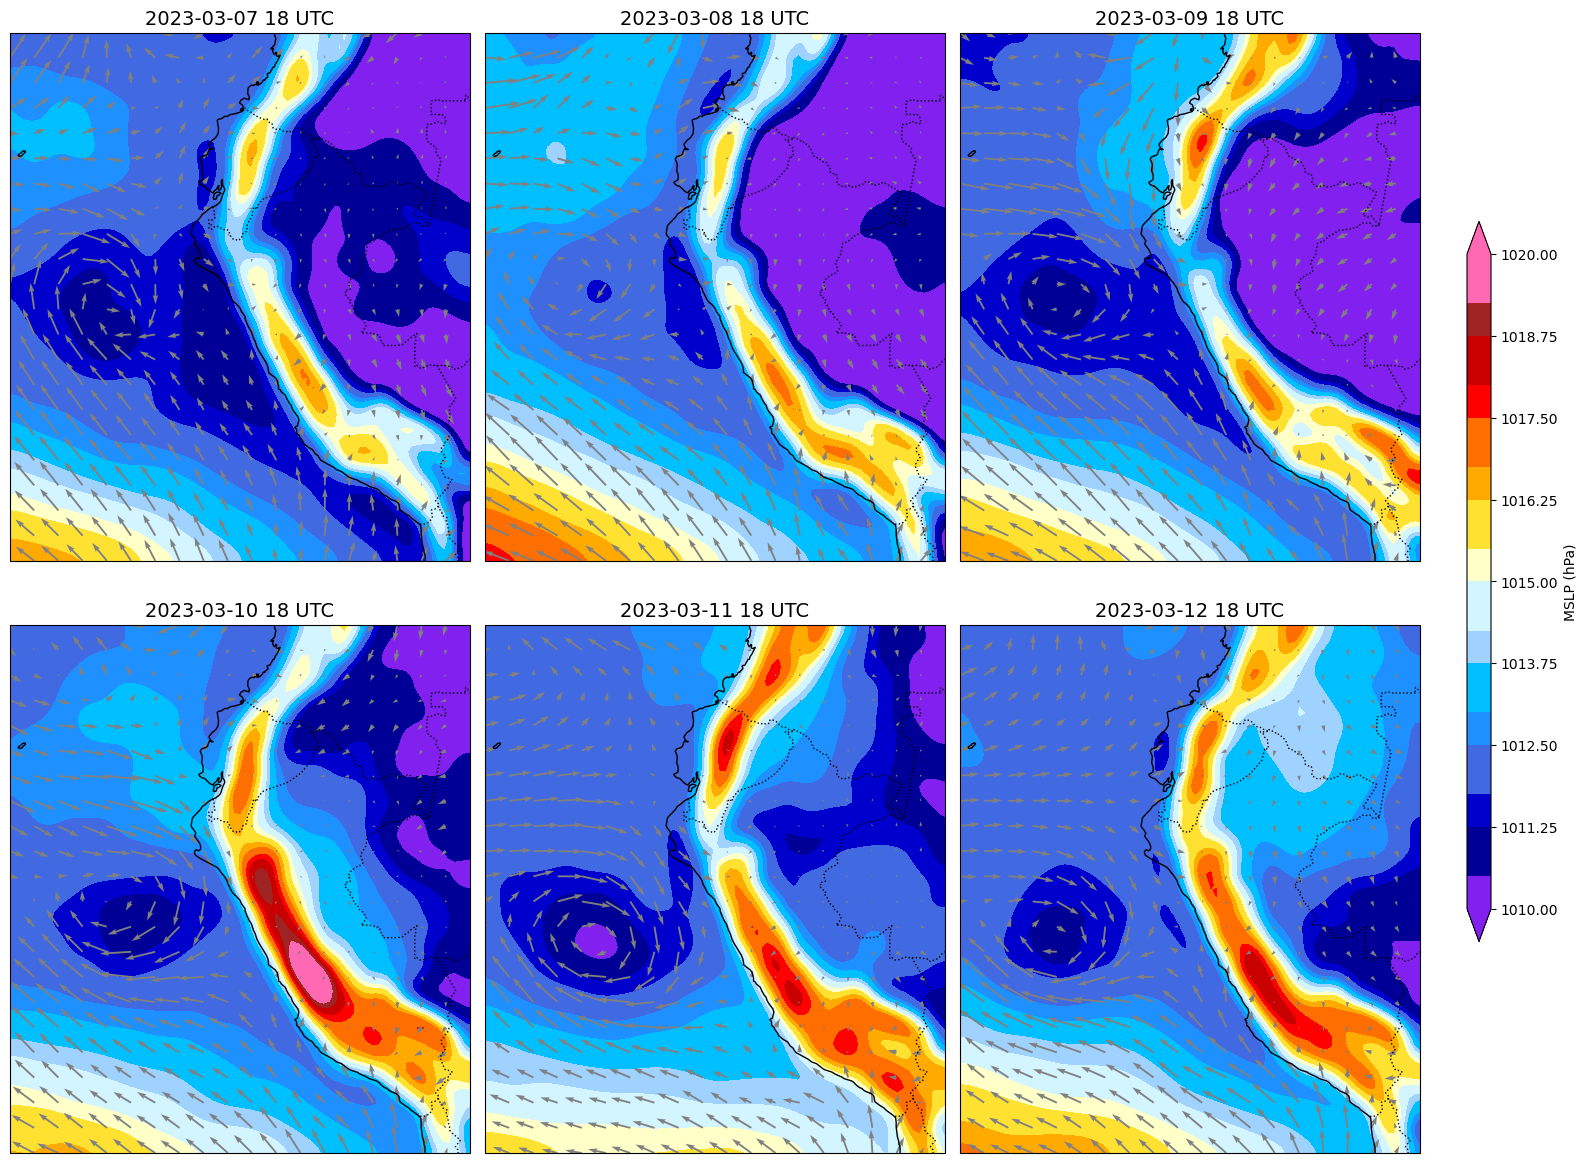

In [9]:
# --- Crear figura y ejes con 6 subplots (2 filas x 3 columnas) ---
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12), subplot_kw={'projection': proj})
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# --- Definir niveles de contorno para MSLP ---
levels = np.arange(1010, 1020.1, 0.25)

# --- Índices de tiempo a graficar ---
time_indices = [3, 4, 5, 6, 7, 8]

# --- Loop sobre los subplots ---
for i, time_sel in enumerate(time_indices):
    ax = axes[i]

    # Dibujar costas y fronteras
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Definir límites geográficos del mapa
    ax.set_extent([-90, -68, -20, 5], crs=ccrs.PlateCarree())

    # Dibujar mapa de contorno (MSLP)
    mslp_plot = ax.contourf(
        mlsp_smooth.longitude, mlsp_smooth.latitude, mlsp_smooth[time_sel],
        levels=levels,
        cmap=cmaps.amwg_blueyellowred,
        extend="both",
        transform=ccrs.PlateCarree()
    )

    # Dibujar vectores de viento
    step = 5
    ax.quiver(
        U10_smooth.longitude[::step], U10_smooth.latitude[::step],
        U10_smooth[time_sel][::step, ::step], V10_smooth[time_sel][::step, ::step],
        transform=ccrs.PlateCarree(), regrid_shape=20,
        color='grey', width=0.0040, scale=100.0
    )

    # Título con la fecha
    date_sel = pd.to_datetime(mlsp.valid_time[time_sel].values).strftime('%Y-%m-%d %H')
    ax.set_title(f"{date_sel} UTC", fontsize=14)

# --- Agregar una sola barra de color para todos los subplots ---
# Usar el primer mapeo de contorno (mslp_plot) como referencia
cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])  # [left, bottom, width, height]
cbar = fig.colorbar(mslp_plot, cax=cbar_ax, orientation='vertical')
cbar.set_label("MSLP (hPa)")

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar para no sobreescribir la colorbar

fig.savefig(f"../fig/MLSP_202303_smoth.png", dpi = 300, facecolor='w', bbox_inches = 'tight', pad_inches = 0.1)

## Análisis de temperatura y Z850

In [10]:
filename = '../data/ERA5/ERA5_202303_T2.nc'
t2 = xr.open_dataset(filename) - 273.15
t2

<xarray.Dataset> Size: 325kB
Dimensions:     (valid_time: 9, latitude: 101, longitude: 89)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 72B 2023-03-04T18:00:00 ... 2023-...
  * latitude    (latitude) float64 808B 5.0 4.75 4.5 4.25 ... -19.5 -19.75 -20.0
  * longitude   (longitude) float64 712B -90.0 -89.75 -89.5 ... -68.25 -68.0
    expver      (valid_time) <U4 144B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 324kB 27.37 ... 18.93
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-07T10:52 GRIB to CDM+CF via cfgrib-0.9.1...

In [11]:
filename = '../data/ERA5/ERA5_202303_Z850.nc'
Z850 = xr.open_dataset(filename).sel(pressure_level=850)/9.8
Z850

<xarray.Dataset> Size: 325kB
Dimensions:         (valid_time: 9, latitude: 101, longitude: 89)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 72B 2023-03-04T18:00:00 ... 2...
    pressure_level  float64 8B 850.0
  * latitude        (latitude) float64 808B 5.0 4.75 4.5 ... -19.5 -19.75 -20.0
  * longitude       (longitude) float64 712B -90.0 -89.75 -89.5 ... -68.25 -68.0
    expver          (valid_time) <U4 144B ...
Data variables:
    z               (valid_time, latitude, longitude) float32 324kB 1.502e+03...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-07T10:56 GRIB to CDM+CF via cfgrib-0.9.1...

In [12]:
# Aplicar suavizado gaussiano al campo geopotencial
Z850_smooth = xr.apply_ufunc(
    gaussian_filter,
    Z850.z,                        # Variable a suavizar
    kwargs={'sigma': 2},          # Sigma controla el nivel de suavizado (ajustable)
    input_core_dims=[["latitude", "longitude"]],
    output_core_dims=[["latitude", "longitude"]],
    vectorize=True  
)

Z850_smooth.name = "Z850_smooth"
Z850_smooth

<xarray.DataArray 'Z850_smooth' (valid_time: 9, latitude: 101, longitude: 89)> Size: 324kB
array([[[1501.0435, 1501.0153, 1500.967 , ..., 1504.6721, 1504.5468,
         1504.4896],
        [1500.9448, 1500.9229, 1500.8866, ..., 1504.2463, 1504.0839,
         1503.9976],
        [1500.8031, 1500.7904, 1500.7715, ..., 1503.4993, 1503.2821,
         1503.1508],
        ...,
        [1509.2477, 1509.1377, 1508.94  , ..., 1463.374 , 1458.642 ,
         1456.1462],
        [1510.3038, 1510.188 , 1509.98  , ..., 1465.4655, 1460.7655,
         1458.2378],
        [1510.9027, 1510.7842, 1510.5712, ..., 1466.8115, 1462.1599,
         1459.6279]],

       [[1516.9845, 1516.5052, 1515.6044, ..., 1506.829 , 1506.9263,
         1507.0142],
        [1517.136 , 1516.678 , 1515.8148, ..., 1506.6842, 1506.7676,
         1506.8472],
        [1517.3824, 1516.9706, 1516.1903, ..., 1506.4338, 1506.4851,
         1506.5452],
...
        [1516.5347, 1516.4589, 1516.3291, ..., 1508.6422, 1503.9308,
         1501.2332],
        [1517.148 , 1517.0592, 1516.9052, ..., 1510.2626, 1505.8279,
         1503.2341],
        [1517.5007, 1517.4052, 1517.238 , ..., 1511.1837, 1506.8944,
         1504.3494]],

       [[1517.9695, 1518.028 , 1518.1344, ..., 1518.1321, 1517.7805,
         1517.5868],
        [1518.078 , 1518.1333, 1518.2318, ..., 1518.0634, 1517.7106,
         1517.5175],
        [1518.2745, 1518.3236, 1518.408 , ..., 1517.9476, 1517.594 ,
         1517.4026],
        ...,
        [1527.389 , 1527.3623, 1527.3154, ..., 1492.7659, 1486.7754,
         1483.5452],
        [1527.6941, 1527.6665, 1527.6166, ..., 1494.3774, 1488.4418,
         1485.1826],
        [1527.8661, 1527.8384, 1527.7876, ..., 1495.3875, 1489.492 ,
         1486.2146]]], shape=(9, 101, 89), dtype=float32)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 72B 2023-03-04T18:00:00 ... 2...
    pressure_level  float64 8B 850.0
  * latitude        (latitude) float64 808B 5.0 4.75 4.5 ... -19.5 -19.75 -20.0
  * longitude       (longitude) float64 712B -90.0 -89.75 -89.5 ... -68.25 -68.0
    expver          (valid_time) <U4 144B ...

In [13]:
time_sel = 7
print(Z850.z[time_sel].min())
print(Z850.z[time_sel].max())

<xarray.DataArray 'z' ()> Size: 8B
array(1483.66589355)
Coordinates:
    number          int64 8B ...
    valid_time      datetime64[ns] 8B 2023-03-11T18:00:00
    pressure_level  float64 8B 850.0
    expver          <U4 16B ...
<xarray.DataArray 'z' ()> Size: 8B
array(1553.27050781)
Coordinates:
    number          int64 8B ...
    valid_time      datetime64[ns] 8B 2023-03-11T18:00:00
    pressure_level  float64 8B 850.0
    expver          <U4 16B ...


Text(0.5, 1.0, '2023-03-11 18UTC')

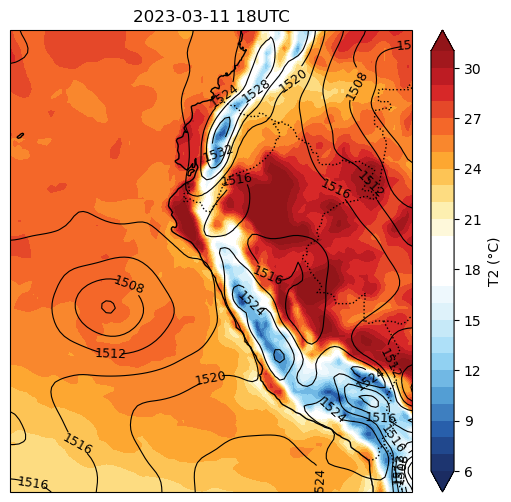

In [14]:
# --- Create figure and axes with Mercator projection ---
# Crea una figura y un eje con tamaño 12x6 pulgadas.
# El eje usa una proyección de mapa especificada en 'proj' (por ejemplo, ccrs.Mercator()).
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': proj})

# Dibuja las líneas de costa en el mapa con una resolución media (50m).
ax.coastlines(resolution='50m')

# Agrega fronteras nacionales al mapa con líneas punteadas.
ax.add_feature(cfeature.BORDERS, linestyle=':')

# --- Opcional: Definir los límites geográficos del mapa ---
# Define el área geográfica que se mostrará: longitud de -90° a -68°, latitud de -20° a 5°.
# Usa la proyección PlateCarree para interpretar correctamente las coordenadas.
ax.set_extent([-90, -68, -20, 5], crs=ccrs.PlateCarree())

# Define los niveles de contorno para el gráfico de presión (MSLP), de 1010 a 1030 hPa con paso de 0.5.
levels = np.arange(6, 32, 1.0)


# Dibuja un mapa de contornos rellenado (contourf) de la temperatura (T2),
# usando el campo 't2.t2m[8]' para una fecha/hora específica (índice 8).
# El mapa se proyecta desde coordenadas lat/lon con PlateCarree.
time_sel = 7
mslp_plot = ax.contourf(
    t2.longitude, t2.latitude, t2.t2m[time_sel],
    levels=levels,
    cmap=cmaps.BlueWhiteOrangeRed,  # Colormap personalizado.
    extend="both",
    transform=ccrs.PlateCarree()
)

# Agrega una barra de colores vertical a la derecha del mapa, para indicar los valores de T2.
cbar = plt.colorbar(mslp_plot, ax=ax, orientation='vertical', pad=0.02, label="T2 (°C)")


# --- Plot Z850 as black contours ---

# Define una lista de niveles de contorno entre 1500 y 1547, con paso de 3 (por ejemplo: 1500, 1503, ..., 1547).
levels_z500 = [lev for lev in np.arange(1500, 1550, 4)] 

# Dibuja contornos en el mapa usando los valores de altura geopotencial a 850 hPa (Z850_smooth) en el tiempo seleccionado.
# Usa las coordenadas de latitud y longitud del dataset Z850.
# Los contornos se dibujan en negro, con grosor de línea de 0.8.
# Se transforma la proyección de lat/lon (PlateCarree) al sistema del mapa actual.
contour = ax.contour(
    Z850.longitude, Z850.latitude, Z850_smooth[time_sel],
    levels=levels_z500,
    colors='black',
    linewidths=0.8,
    transform=ccrs.PlateCarree()
)

# Agrega etiquetas numéricas a las líneas de contorno (valores de altura geopotencial).
# 'fmt' define el formato de número entero, y 'fontsize' define el tamaño de letra.
ax.clabel(contour, fmt='%d', fontsize=9)

# Convierte la fecha/hora del índice seleccionado (time_sel) en un string con formato 'YYYY-MM-DD HH'.
# Esto se usará como título del gráfico para indicar el momento de la visualización.
date_sel = pd.to_datetime(t2.valid_time[time_sel].values).strftime('%Y-%m-%d %H')

# Establece el título del eje (mapa), incluyendo la hora en formato UTC.
ax.set_title(f"{date_sel}UTC")


/tmp/ipykernel_42460/3718126983.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


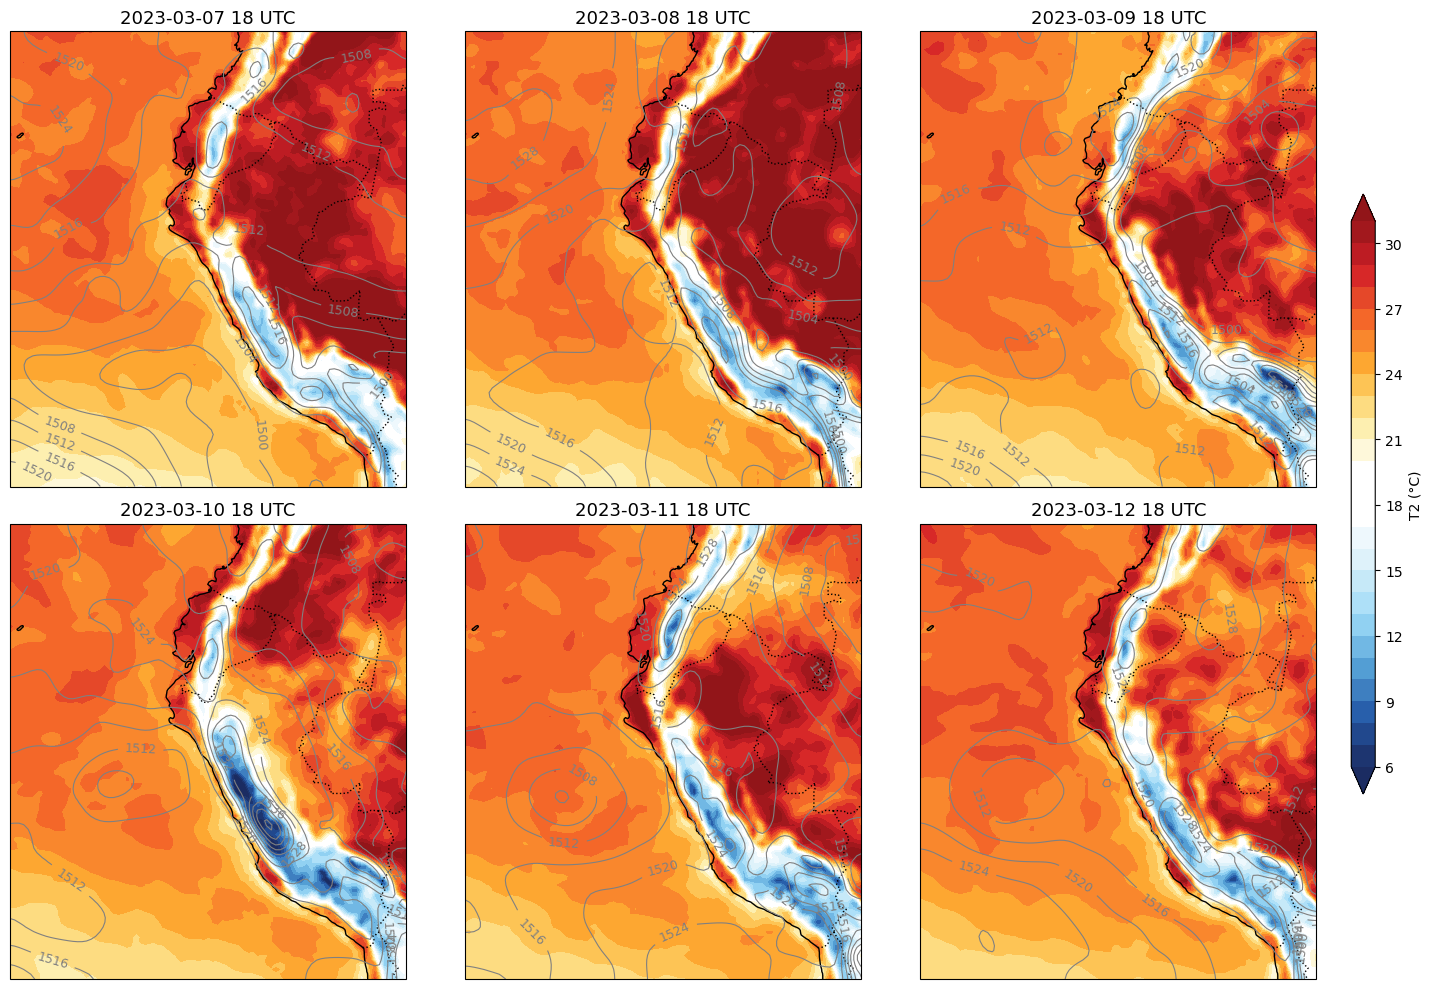

In [15]:
# --- Crear figura y ejes con 6 subplots (2 filas x 3 columnas) ---
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), subplot_kw={'projection': proj})
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# --- Definir niveles ---
levels_t2 = np.arange(6, 32, 1.0)
levels_z850 = np.arange(1500, 1550, 4)

# --- Índices de tiempo a graficar ---
time_indices = [3, 4, 5, 6, 7, 8]

# --- Loop sobre los subplots ---
for i, time_sel in enumerate(time_indices):
    ax = axes[i]

    # Dibujar costas y fronteras
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Definir límites geográficos del mapa
    ax.set_extent([-90, -68, -20, 5], crs=ccrs.PlateCarree())

    # --- Mapa de temperatura T2 (contorno coloreado) ---
    t2_plot = ax.contourf(
        t2.longitude, t2.latitude, t2.t2m[time_sel],
        levels=levels_t2,
        cmap=cmaps.BlueWhiteOrangeRed,
        extend="both",
        transform=ccrs.PlateCarree()
    )

    # --- Contornos de geopotencial Z850 ---
    z850_contour = ax.contour(
        Z850.longitude, Z850.latitude, Z850_smooth[time_sel],
        levels=levels_z850,
        colors='grey',
        linewidths=0.8,
        transform=ccrs.PlateCarree()
    )
    ax.clabel(z850_contour, fmt='%d', fontsize=9)

    # --- Fecha como título del subplot ---
    date_sel = pd.to_datetime(t2.valid_time[time_sel].values).strftime('%Y-%m-%d %H')
    ax.set_title(f"{date_sel} UTC", fontsize=13)

# --- Barra de colores común ---
cbar_ax = fig.add_axes([0.88, 0.2, 0.015, 0.6])  # [left, bottom, width, height]
cbar = fig.colorbar(t2_plot, cax=cbar_ax, orientation='vertical')
cbar.set_label("T2 (°C)")

# --- Ajustar diseño para no solapar la colorbar ---
plt.tight_layout(rect=[0, 0, 0.9, 1])

# --- Guardar figura ---
fig.savefig("../fig/T2_Z850_202303.png", dpi=300, facecolor='w', bbox_inches='tight', pad_inches=0.1)


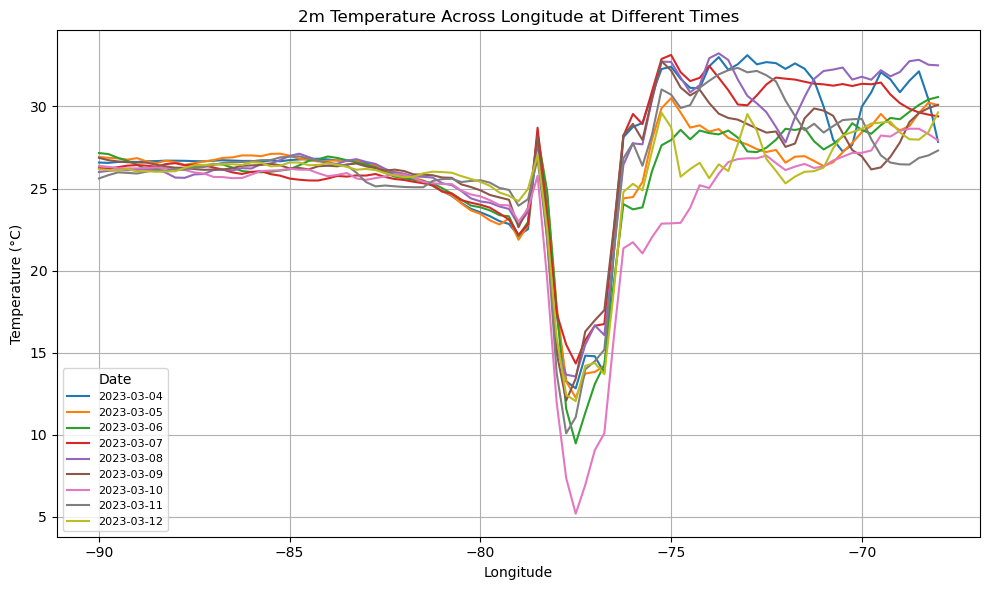

In [16]:
# Extract the time series at the desired latitude
t2m_lon = t2.sel(latitude=-8.9, method='nearest').t2m

# Set figure size
plt.figure(figsize=(10, 6))

# Plot each time step as a separate line
for t in t2m_lon.valid_time.values:
    date_str = pd.to_datetime(t).strftime('%Y-%m-%d')  # Format to just date
    t2m_lon.sel(valid_time=t).plot(label=date_str)

# Customize plot
plt.title('2m Temperature Across Longitude at Different Times')
plt.xlabel('Longitude')
plt.ylabel('Temperature (°C)')
plt.legend(title='Date', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

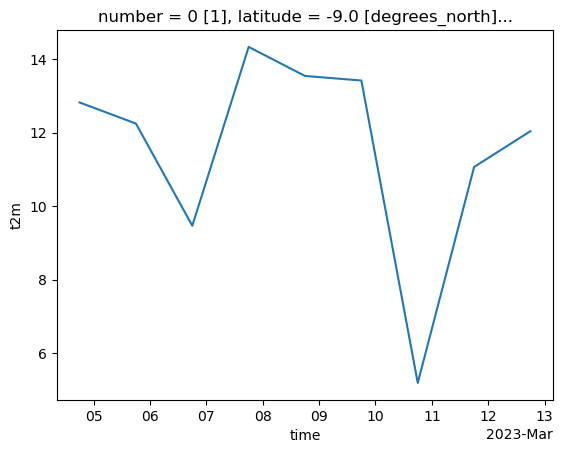

In [17]:
t2.sel(latitude=-8.9, longitude=-77.6, method='nearest').t2m.plot()

## Análisis de precipitación y Z850

In [18]:
filename = '../data/ERA5/ERA5_202303_RRR.nc'
rrr = xr.open_dataset(filename) * 1000
rrr

<xarray.Dataset> Size: 8MB
Dimensions:     (valid_time: 216, latitude: 101, longitude: 89)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 2kB 2023-03-04 ... 2023-03-12T23:...
  * latitude    (latitude) float64 808B 5.0 4.75 4.5 4.25 ... -19.5 -19.75 -20.0
  * longitude   (longitude) float64 712B -90.0 -89.75 -89.5 ... -68.25 -68.0
    expver      (valid_time) <U4 3kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 8MB 0.1268 ... 0.0
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-07T08:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [19]:
rrr.resample(valid_time='1d').sum()

<xarray.Dataset> Size: 325kB
Dimensions:     (valid_time: 9, latitude: 101, longitude: 89)
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 808B 5.0 4.75 4.5 4.25 ... -19.5 -19.75 -20.0
  * longitude   (longitude) float64 712B -90.0 -89.75 -89.5 ... -68.25 -68.0
  * valid_time  (valid_time) datetime64[ns] 72B 2023-03-04 ... 2023-03-12
Data variables:
    tp          (valid_time, latitude, longitude) float32 324kB 13.16 ... 0.0...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-07T08:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [20]:
def sumar_ventana_18h(data, dim_tiempo="time"):
    """
    Suma los valores en una ventana de 24 horas centrada a las 18h de cada día
    (de 16h del día anterior a 16h del día siguiente).

    Parámetros:
    -----------
    data : xarray.DataArray o xarray.Dataset
        Datos con dimensión temporal.
    dim_tiempo : str
        Nombre de la dimensión temporal. Por defecto: "time".

    Retorna:
    --------
    xarray.DataArray o xarray.Dataset
        Suma de la ventana para cada fecha a las 16h.
    """
    # Filtrar los tiempos a las 16h
    horas_16 = data.sel({dim_tiempo: data[dim_tiempo].dt.hour == 18})

    resultados = []

    for t in horas_16[dim_tiempo].values:
        inicio = pd.Timestamp(t) - pd.Timedelta(days=1)
        fin = pd.Timestamp(t)

        suma = data.sel({dim_tiempo: slice(inicio, fin)}).sum(dim=dim_tiempo)

        # Asignar coordenada temporal t para este resultado
        suma_expandida = suma.expand_dims({dim_tiempo: [t]})
        resultados.append(suma_expandida)

    # Concatenar en la dimensión temporal
    return xr.concat(resultados, dim=dim_tiempo)


In [21]:
rrr_18h = sumar_ventana_18h(rrr, dim_tiempo='valid_time')

Text(0.5, 1.0, '2023-03-11 18UTC')

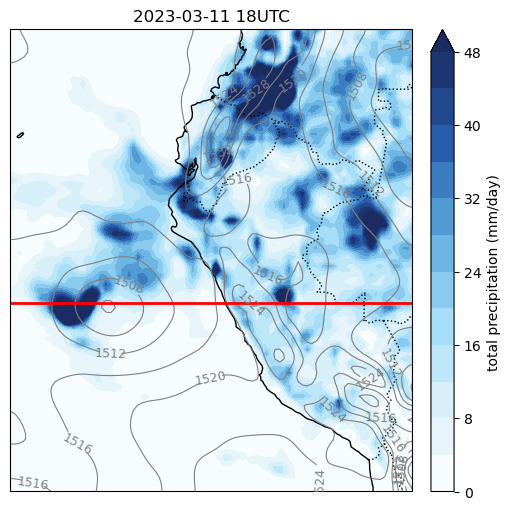

In [22]:
# --- Create figure and axes with Mercator projection ---
# Crea una figura y un eje con tamaño 12x6 pulgadas.
# El eje usa una proyección de mapa especificada en 'proj' (por ejemplo, ccrs.Mercator()).
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': proj})

# Dibuja las líneas de costa en el mapa con una resolución media (50m).
ax.coastlines(resolution='50m')

# Agrega fronteras nacionales al mapa con líneas punteadas.
ax.add_feature(cfeature.BORDERS, linestyle=':')

# --- Opcional: Definir los límites geográficos del mapa ---
# Define el área geográfica que se mostrará: longitud de -90° a -68°, latitud de -20° a 5°.
# Usa la proyección PlateCarree para interpretar correctamente las coordenadas.
ax.set_extent([-90, -68, -20, 5], crs=ccrs.PlateCarree())

# Define los niveles de contorno para el gráfico de presión (MSLP), de 1010 a 1030 hPa con paso de 0.5.
levels = np.arange(0, 50, 4.0)


# Dibuja un mapa de contornos rellenado (contourf) de la precipitación total (RRR),
# usando el campo 't2.t2m[8]' para una fecha/hora específica (índice 8).
# El mapa se proyecta desde coordenadas lat/lon con PlateCarree.
time_sel = 7
mslp_plot = ax.contourf(
    rrr_18h.longitude, rrr_18h.latitude, rrr_18h.tp[time_sel],
    levels=levels,
    cmap=cmaps.WhiteBlue,  # Colormap personalizado.
    extend="max",
    transform=ccrs.PlateCarree()
)

# Agrega una barra de colores vertical a la derecha del mapa, para indicar los valores de RRR.
cbar = plt.colorbar(mslp_plot, ax=ax, orientation='vertical', pad=0.02, label="total precipitation (mm/day)")


# --- Plot Z850 as black contours ---

# Define una lista de niveles de contorno entre 1500 y 1547, con paso de 3 (por ejemplo: 1500, 1503, ..., 1547).
levels_z500 = [lev for lev in np.arange(1500, 1550, 4)] 

# Dibuja contornos en el mapa usando los valores de altura geopotencial a 850 hPa (Z850_smooth) en el tiempo seleccionado.
# Usa las coordenadas de latitud y longitud del dataset Z850.
# Los contornos se dibujan en negro, con grosor de línea de 0.8.
# Se transforma la proyección de lat/lon (PlateCarree) al sistema del mapa actual.
contour = ax.contour(
    Z850.longitude, Z850.latitude, Z850_smooth[time_sel],
    levels=levels_z500,
    colors='grey',
    linewidths=0.8,
    transform=ccrs.PlateCarree()
)

# Agrega etiquetas numéricas a las líneas de contorno (valores de altura geopotencial).
# 'fmt' define el formato de número entero, y 'fontsize' define el tamaño de letra.
ax.clabel(contour, fmt='%d', fontsize=9)
# Extract longitude array (or define it manually if needed)
lons = rrr_18h.longitude.values

# Define constant latitude array with same shape as longitude
lats = np.full_like(lons, -10.0)

# Plot the line in red across the full longitudinal extent
ax.plot(lons, lats, 'r', transform=ccrs.PlateCarree(), linewidth=2)
# Convierte la fecha/hora del índice seleccionado (time_sel) en un string con formato 'YYYY-MM-DD HH'.
# Esto se usará como título del gráfico para indicar el momento de la visualización.
date_sel = pd.to_datetime(rrr_18h.valid_time[time_sel].values).strftime('%Y-%m-%d %H')

# Establece el título del eje (mapa), incluyendo la hora en formato UTC.
ax.set_title(f"{date_sel}UTC")


/tmp/ipykernel_42460/1577690792.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


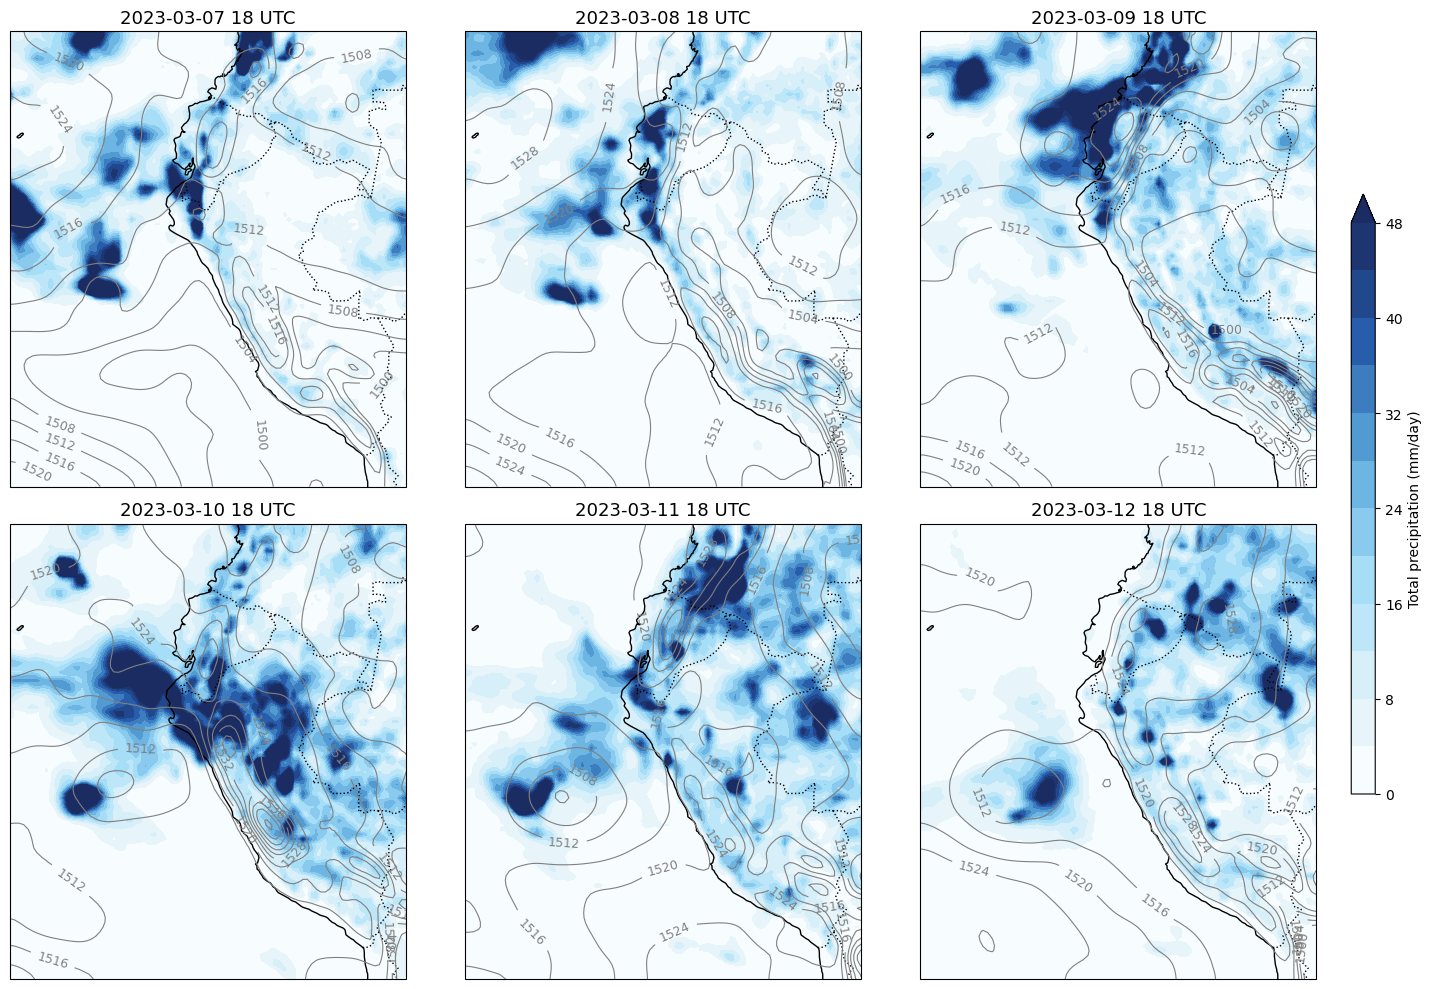

In [23]:
# --- Crear figura y ejes con 6 subplots (2 filas x 3 columnas) ---
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), subplot_kw={'projection': proj})
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# --- Definir niveles ---
levels_precip = np.arange(0, 50, 4.0)
levels_z850 = np.arange(1500, 1550, 4)

# --- Índices de tiempo a graficar ---
time_indices = [3, 4, 5, 6, 7, 8]

# --- Loop sobre los subplots ---
for i, time_sel in enumerate(time_indices):
    ax = axes[i]

    # Dibujar costas y fronteras
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Definir límites geográficos del mapa
    ax.set_extent([-90, -68, -20, 5], crs=ccrs.PlateCarree())

    # --- Mapa de precipitación (contorno coloreado) ---
    precip_plot = ax.contourf(
        rrr_18h.longitude, rrr_18h.latitude, rrr_18h.tp[time_sel],
        levels=levels_precip,
        cmap=cmaps.WhiteBlue,
        extend="max",
        transform=ccrs.PlateCarree()
    )

    # --- Contornos de geopotencial Z850 ---
    z850_contour = ax.contour(
        Z850.longitude, Z850.latitude, Z850_smooth[time_sel],
        levels=levels_z850,
        colors='grey',
        linewidths=0.8,
        transform=ccrs.PlateCarree()
    )
    ax.clabel(z850_contour, fmt='%d', fontsize=9)

    # --- Fecha como título del subplot ---
    date_sel = pd.to_datetime(rrr_18h.valid_time[time_sel].values).strftime('%Y-%m-%d %H')
    ax.set_title(f"{date_sel} UTC", fontsize=13)

# --- Barra de colores común ---
cbar_ax = fig.add_axes([0.88, 0.2, 0.015, 0.6])  # [left, bottom, width, height]
cbar = fig.colorbar(precip_plot, cax=cbar_ax, orientation='vertical')
cbar.set_label("Total precipitation (mm/day)")

# --- Ajustar diseño para no solapar la colorbar ---
plt.tight_layout(rect=[0, 0, 0.9, 1])

# --- Guardar figura ---
fig.savefig("../fig/Precip_Z850_202303.png", dpi=300, facecolor='w', bbox_inches='tight', pad_inches=0.1)

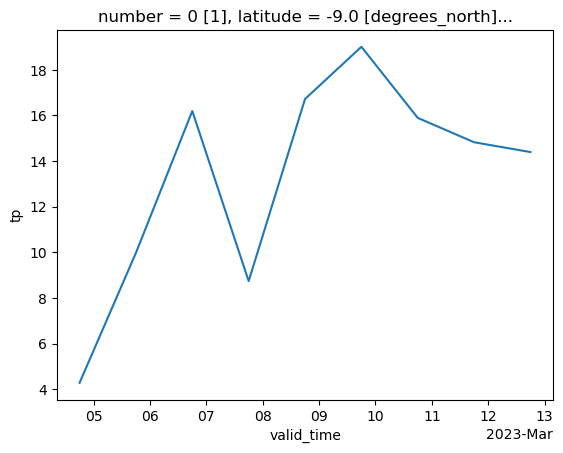

In [24]:
rrr_18h.sel(latitude=-8.9, longitude=-77.6, method='nearest').tp.plot()

## Análisis de la humedad transportada

In [25]:
filename = '../data/ERA5/ERA5_202303_IVTu.nc'
IVTu = xr.open_dataset(filename)
filename = '../data/ERA5/ERA5_202303_IVTv.nc'
IVTv = xr.open_dataset(filename)

In [26]:
IVT = np.sqrt(IVTu.viwve**2 +IVTv.viwvn**2)

In [27]:
IVT

<xarray.DataArray (valid_time: 9, latitude: 101, longitude: 89)> Size: 324kB
array([[[ 55.325863,  59.75888 ,  64.87875 , ..., 201.62068 ,
         194.58994 , 191.41716 ],
        [ 50.33185 ,  52.163467,  52.454796, ..., 177.0189  ,
         186.76524 , 190.66359 ],
        [ 48.119217,  46.28824 ,  46.207115, ..., 172.86377 ,
         183.71016 , 206.07097 ],
        ...,
        [192.4122  , 188.0681  , 183.03021 , ...,  10.746842,
          14.422974,  18.789267],
        [185.35022 , 184.39825 , 180.7713  , ...,   9.544199,
          12.841331,  15.090301],
        [173.11108 , 174.52116 , 175.85242 , ...,   8.568507,
           9.771561,  11.176387]],

       [[210.67781 , 262.76056 , 317.9141  , ...,  92.95112 ,
          86.16827 ,  83.26963 ],
        [201.42903 , 254.51105 , 299.39096 , ...,  93.431915,
          84.632904,  80.24704 ],
        [202.26624 , 248.6661  , 284.10654 , ..., 102.21381 ,
          93.54993 ,  88.17723 ],
...
        [ 83.02381 ,  81.28921 ,  78.83335 , ...,  20.525282,
          21.237263,  23.266527],
        [ 81.22914 ,  79.684265,  77.54023 , ...,  16.252554,
          17.40104 ,  18.913733],
        [ 79.01871 ,  77.26135 ,  74.99553 , ...,  14.627554,
          14.224502,  15.728203]],

       [[ 69.034   ,  78.904976,  88.56442 , ..., 139.86029 ,
         138.67947 , 143.75851 ],
        [ 68.60455 ,  75.421196,  82.67652 , ..., 135.77701 ,
         137.59793 , 141.94867 ],
        [ 72.01766 ,  76.606964,  81.568794, ..., 137.2519  ,
         139.2234  , 144.20474 ],
        ...,
        [ 81.893196,  75.690575,  70.29619 , ...,  25.769379,
          25.490356,  25.52028 ],
        [ 87.120476,  81.342735,  74.42272 , ...,  22.072424,
          22.004627,  21.653955],
        [ 87.35809 ,  84.524376,  77.705086, ...,  17.428465,
          17.273487,  16.677538]]], shape=(9, 101, 89), dtype=float32)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 72B 2023-03-04T18:00:00 ... 2023-...
  * latitude    (latitude) float64 808B 5.0 4.75 4.5 4.25 ... -19.5 -19.75 -20.0
  * longitude   (longitude) float64 712B -90.0 -89.75 -89.5 ... -68.25 -68.0
    expver      (valid_time) <U4 144B '0001' '0001' '0001' ... '0001' '0001'

Text(0.5, 1.0, '2023-03-12 18UTC')

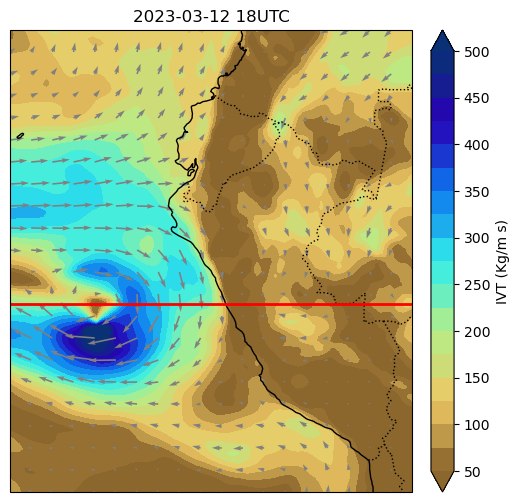

In [28]:
# --- Create figure and axes with Mercator projection ---
# Crea una figura y un eje con tamaño 12x6 pulgadas.
# El eje usa una proyección de mapa especificada en 'proj' (por ejemplo, ccrs.Mercator()).
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': proj})

# Dibuja las líneas de costa en el mapa con una resolución media (50m).
ax.coastlines(resolution='50m')

# Agrega fronteras nacionales al mapa con líneas punteadas.
ax.add_feature(cfeature.BORDERS, linestyle=':')

# --- Opcional: Definir los límites geográficos del mapa ---
# Define el área geográfica que se mostrará: longitud de -90° a -68°, latitud de -20° a 5°.
# Usa la proyección PlateCarree para interpretar correctamente las coordenadas.
ax.set_extent([-90, -68, -20, 5], crs=ccrs.PlateCarree())

# Define los niveles de contorno para el gráfico de presión (MSLP), de 1010 a 1030 hPa con paso de 0.5.
levels = np.arange(50, 525, 25)


# Dibuja un mapa de contornos rellenado (contourf) de la presión al nivel del mar (MSLP),
# usando el campo 'mlsp.msl[8]' para una fecha/hora específica (índice 8).
# El mapa se proyecta desde coordenadas lat/lon con PlateCarree.
time_sel = 8
mslp_plot = ax.contourf(
    IVT.longitude, IVT.latitude, IVT[time_sel],
    levels=levels,
    cmap=cmaps.GMT_drywet,  # Colormap personalizado.
    extend="both",
    transform=ccrs.PlateCarree()
)

# Agrega una barra de colores vertical a la derecha del mapa, para indicar los valores de MSLP.
cbar = plt.colorbar(mslp_plot, ax=ax, orientation='vertical', pad=0.02, label="IVT (Kg/m s)")

# --- Dibujar vectores de viento (u, v) ---
# Define un paso para reducir la cantidad de flechas de viento, haciendo el gráfico más limpio.
step = 5

# Dibuja vectores de viento en el mapa usando los campos U10 (componente zonal) y V10 (meridional),
# tomando solo cada 5° punto para aligerar la visualización.
# Las flechas se dibujan en gris y escaladas para representar la dirección e intensidad del viento.
ax.quiver(
    IVT.longitude[::step], IVT.latitude[::step],
    IVTu.viwve[time_sel][::step, ::step], IVTv.viwvn[time_sel][::step, ::step],
    transform=ccrs.PlateCarree(),   # Transforma coordenadas lon/lat al sistema de la proyección.
    regrid_shape=20,                # Interpolación espacial opcional (algunas versiones de Cartopy pueden ignorar).
    color='grey', width=0.0040, scale=5800.0,  # Estética del vector de viento.
)

# Extract longitude array (or define it manually if needed)
lons = IVT.longitude.values

# Define constant latitude array with same shape as longitude
lats = np.full_like(lons, -10.0)

# Plot the line in red across the full longitudinal extent
ax.plot(lons, lats, 'r', transform=ccrs.PlateCarree(), linewidth=2)

date_sel = pd.to_datetime(IVT.valid_time[time_sel].values).strftime('%Y-%m-%d %H')
ax.set_title(f"{date_sel}UTC")

/tmp/ipykernel_42460/1005445998.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar para no sobreescribir la colorbar


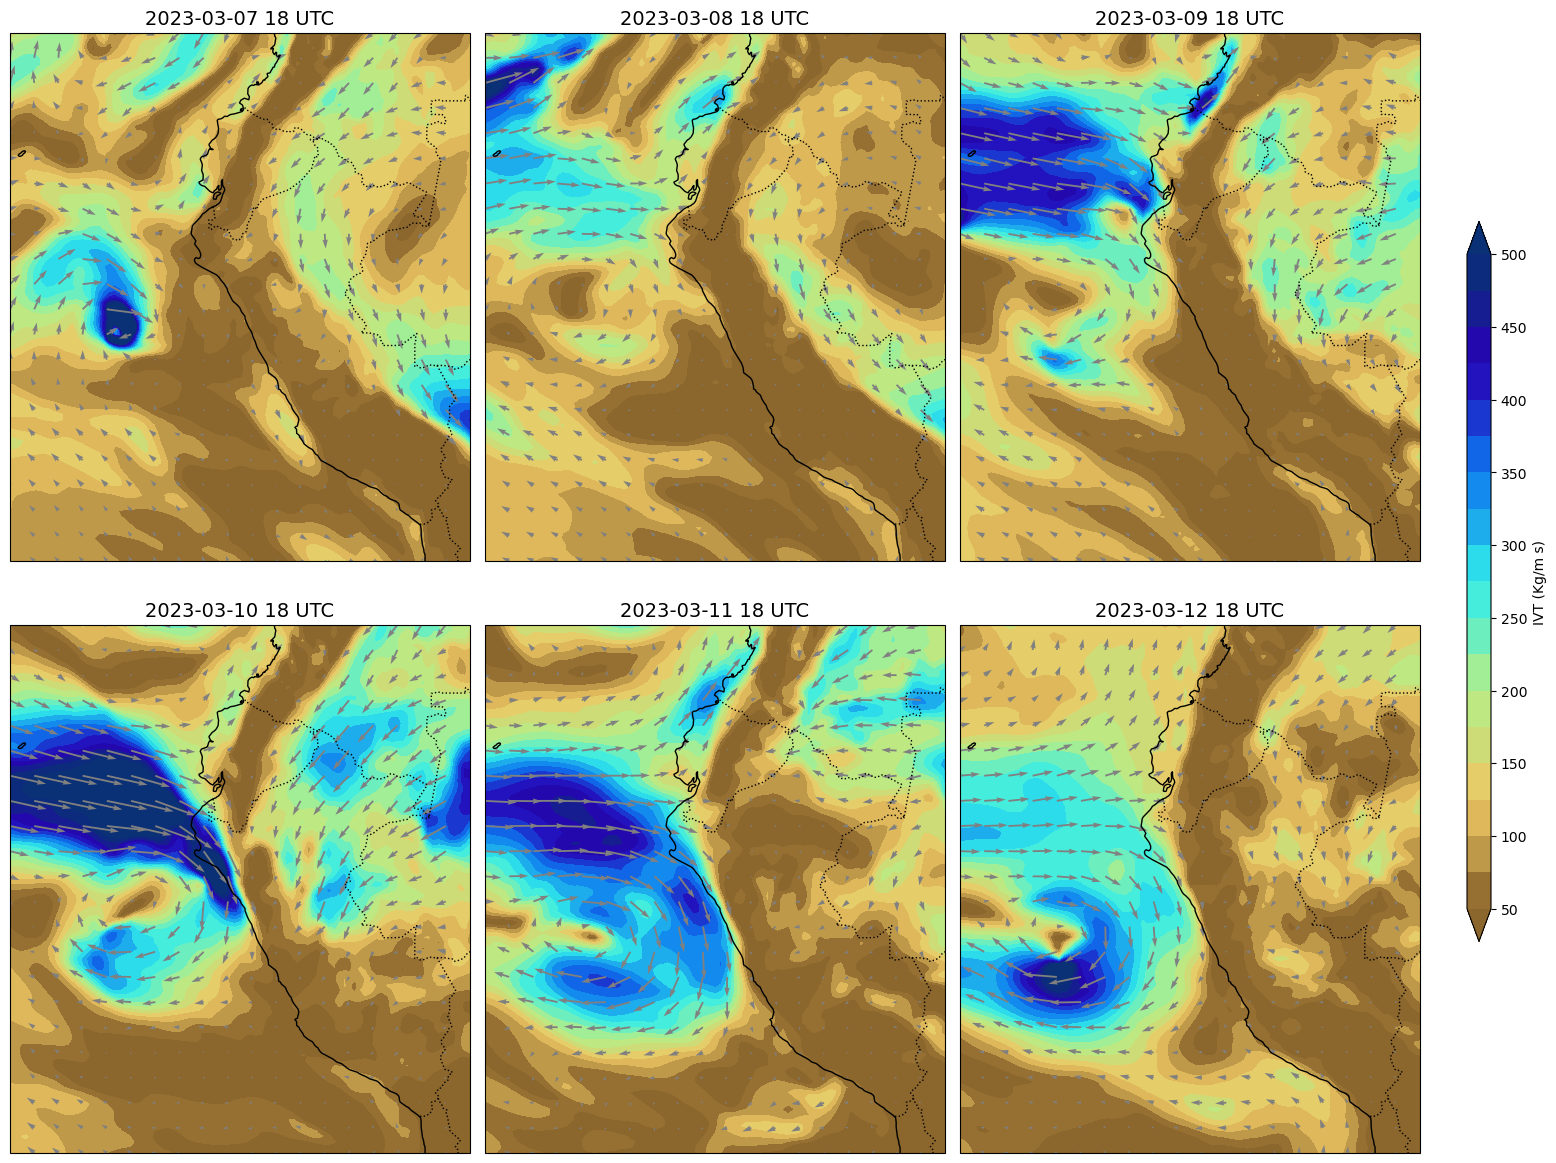

In [29]:
# --- Crear figura y ejes con 6 subplots (2 filas x 3 columnas) ---
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12), subplot_kw={'projection': proj})
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# --- Definir niveles de contorno para MSLP ---
levels = np.arange(50, 525, 25)

# --- Índices de tiempo a graficar ---
time_indices = [3, 4, 5, 6, 7, 8]

# --- Loop sobre los subplots ---
for i, time_sel in enumerate(time_indices):
    ax = axes[i]

    # Dibujar costas y fronteras
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Definir límites geográficos del mapa
    ax.set_extent([-90, -68, -20, 5], crs=ccrs.PlateCarree())

    # Dibujar mapa de contorno (MSLP)
    mslp_plot = ax.contourf(
        IVT.longitude, IVT.latitude, IVT[time_sel],
        levels=levels,
        cmap=cmaps.GMT_drywet,
        extend="both",
        transform=ccrs.PlateCarree()
    )

    # Dibujar vectores de viento
    step = 5
    ax.quiver(
        IVT.longitude[::step], IVT.latitude[::step],
        IVTu.viwve[time_sel][::step, ::step], IVTv.viwvn[time_sel][::step, ::step],
        transform=ccrs.PlateCarree(), regrid_shape=20,
        color='grey', width=0.0040, scale=5800
    )

    # Título con la fecha
    date_sel = pd.to_datetime(IVT.valid_time[time_sel].values).strftime('%Y-%m-%d %H')
    ax.set_title(f"{date_sel} UTC", fontsize=14)

# --- Agregar una sola barra de color para todos los subplots ---
# Usar el primer mapeo de contorno (mslp_plot) como referencia
cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])  # [left, bottom, width, height]
cbar = fig.colorbar(mslp_plot, cax=cbar_ax, orientation='vertical')
cbar.set_label("IVT (Kg/m s)")

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar para no sobreescribir la colorbar

fig.savefig(f"../fig/IVT_202303.png", dpi = 300, facecolor='w', bbox_inches = 'tight', pad_inches = 0.1)

## Análisis de la velocidad del viento en el perfil vertical

In [30]:
# Pressure to height conversion function
def pressure_to_height(pressure_hpa):
    return 44330 * (1 - (pressure_hpa / 1013.25) ** (1 / 5.255))

In [31]:
filename = '../data/ERA5/ERA5_202303_U_pl.nc'
U = xr.open_dataset(filename)

filename = '../data/ERA5/ERA5_202303_V_pl.nc'
V = xr.open_dataset(filename)
WS = np.sqrt(U.u**2 +V.v**2)
#WS.name = 'WS'

lat_sel = -9.8

In [32]:
g = 9.80665  # m/s²
filename = '../data/ERA5/ERA5_202303_H.nc'
H = (xr.open_dataset(filename).sel(latitude=lat_sel, method='nearest')/g).clip(0)
H

<xarray.Dataset> Size: 1kB
Dimensions:     (valid_time: 1, longitude: 89)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8B 2023-03-04T18:00:00
    latitude    float64 8B -9.75
  * longitude   (longitude) float64 712B -90.0 -89.75 -89.5 ... -68.25 -68.0
    expver      <U4 16B ...
Data variables:
    z           (valid_time, longitude) float32 356B 0.0 0.6368 ... 200.4 180.7
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-10T13:52 GRIB to CDM+CF via cfgrib-0.9.1...

<xarray.DataArray 'z' ()> Size: 8B
array(4400.04980469)
Coordinates:
    number    int64 8B ...
    latitude  float64 8B -9.75
    expver    <U4 16B ...


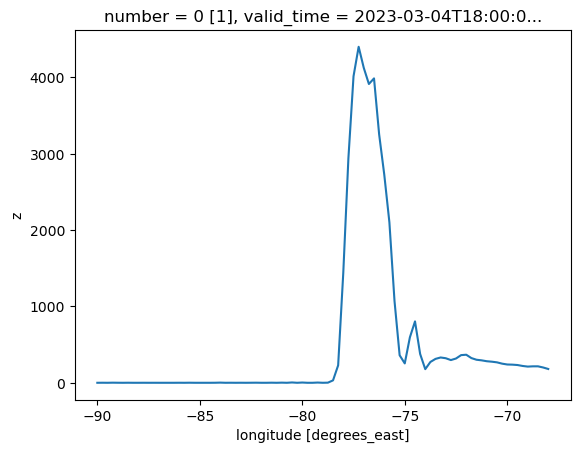

In [40]:
print(H.z.max())
H.z.plot()

In [34]:
time_idx = 7

In [41]:
# Slice dataset at the nearest latitude = -6
ws_section = WS.sel(latitude=lat_sel,  method='nearest').sel(longitude=slice(-90,-77)).sel(pressure_level=slice(1000,500)).isel(valid_time=time_idx)
ws_section

<xarray.DataArray (pressure_level: 16, longitude: 53)> Size: 3kB
array([[ 2.1893587 ,  2.1749034 ,  2.287945  ,  2.516982  ,  2.7955925 ,
         3.1663675 ,  3.6819043 ,  4.2271566 ,  4.6935844 ,  5.022603  ,
         5.272587  ,  5.3020687 ,  5.036488  ,  4.68488   ,  4.5150084 ,
         4.305077  ,  4.049718  ,  3.9973469 ,  3.9332516 ,  3.56101   ,
         3.2197726 ,  3.3697283 ,  3.9730341 ,  5.0468345 ,  6.15547   ,
         7.053976  ,  7.4410396 ,  7.198204  ,  6.8372855 ,  6.750277  ,
         6.8910484 ,  6.968099  ,  7.0608    ,  7.3259344 ,  7.431743  ,
         7.415537  ,  7.475556  ,  7.1051836 ,  6.3080273 ,  5.5394616 ,
         5.0010276 ,  4.376495  ,  3.1388736 ,  2.216054  ,  1.542105  ,
         0.1863672 ,  0.7747827 ,  0.87552816,  1.5741084 ,  2.5064516 ,
         1.6979641 ,  0.44693476,  2.0190382 ],
       [ 2.2438226 ,  2.3187656 ,  2.5755517 ,  2.8528996 ,  3.1226466 ,
         3.3523715 ,  3.73557   ,  4.23618   ,  4.731979  ,  5.060727  ,
         5.3365245 ,  5.44219   ,  5.2455635 ,  4.886097  ,  4.6776075 ,
         4.5120697 ,  4.203732  ,  4.1039333 ,  4.1139235 ,  3.7821248 ,
         3.404663  ,  3.4453163 ,  4.0722623 ,  5.189575  ,  6.431871  ,
         7.4496427 ,  7.822936  ,  7.5787153 ,  7.2824802 ,  7.376353  ,
         7.63549   ,  7.794053  ,  7.9428477 ,  8.153168  ,  7.9827676 ,
         7.6380153 ,  7.568776  ,  7.1637516 ,  7.020505  ,  6.69827   ,
         5.6993403 ,  4.773464  ,  3.7075336 ,  3.3849046 ,  3.5366    ,
...
         7.334811  ,  7.228248  ,  7.116662  ,  7.0751433 ,  7.0433817 ,
         7.042182  ,  6.933894  ,  6.6590176 ,  6.3136163 ,  5.925856  ,
         5.4070244 ,  4.843836  ,  4.563897  ,  4.4032817 ,  4.3311057 ,
         4.0063753 ,  3.2857852 ,  2.945986  ,  2.940371  ,  3.0187452 ,
         3.362009  ,  3.9435823 ,  4.5647736 ,  5.2468953 ,  5.669342  ,
         6.008518  ,  6.4175134 ,  7.1247587 ,  8.140036  ,  9.107711  ,
         9.697632  ,  9.574197  ,  9.049262  ,  8.42708   ,  7.7487483 ,
         6.650592  ,  5.57184   ,  5.2805076 ,  4.827109  ,  3.1564531 ,
         1.2064035 ,  1.8412867 ,  4.0493007 ],
       [12.864423  , 13.329684  , 12.704931  , 11.830769  , 10.811559  ,
         9.86369   ,  8.646666  ,  7.4289494 ,  6.8709464 ,  6.8541474 ,
         7.2503324 ,  7.5366225 ,  7.6300626 ,  7.5828776 ,  7.320379  ,
         7.0659046 ,  6.7396464 ,  6.368497  ,  6.0714846 ,  5.987531  ,
         6.038293  ,  6.030563  ,  5.974501  ,  5.7669644 ,  5.241523  ,
         4.449125  ,  3.7463808 ,  3.2903323 ,  3.1918309 ,  3.5675156 ,
         4.2172008 ,  4.716661  ,  4.9996586 ,  5.1765995 ,  5.4363265 ,
         5.8275976 ,  6.099092  ,  6.065993  ,  6.05299   ,  6.4683485 ,
         7.3613296 ,  8.006179  ,  8.148579  ,  7.770305  ,  7.003795  ,
         6.3712735 ,  6.176569  ,  5.9041505 ,  5.975364  ,  5.647392  ,
         4.9627957 ,  4.7975125 ,  4.6861615 ]], dtype=float32)
Coordinates:
    number          int64 8B 0
    valid_time      datetime64[ns] 8B 2023-03-11T18:00:00
  * pressure_level  (pressure_level) float64 128B 1e+03 975.0 ... 550.0 500.0
    latitude        float64 8B -9.75
  * longitude       (longitude) float64 424B -90.0 -89.75 -89.5 ... -77.25 -77.0
    expver          <U4 16B '0001'

In [42]:
ws_section.pressure_level.values

array([1000.,  975.,  950.,  925.,  900.,  875.,  850.,  825.,  800.,
        775.,  750.,  700.,  650.,  600.,  550.,  500.])

In [43]:
# Convert pressure levels to height
height_levels = pressure_to_height(ws_section.pressure_level.values)
height_levels

array([ 110.90104539,  323.42970692,  540.4176352 ,  762.07952581,
        988.64656275, 1220.36818377, 1457.51409129, 1700.37655136,
       1949.27303198, 2204.54924335, 2466.58265617, 3012.61500374,
       3591.1989024 , 4207.01915369, 4865.89864028, 5575.20904315])

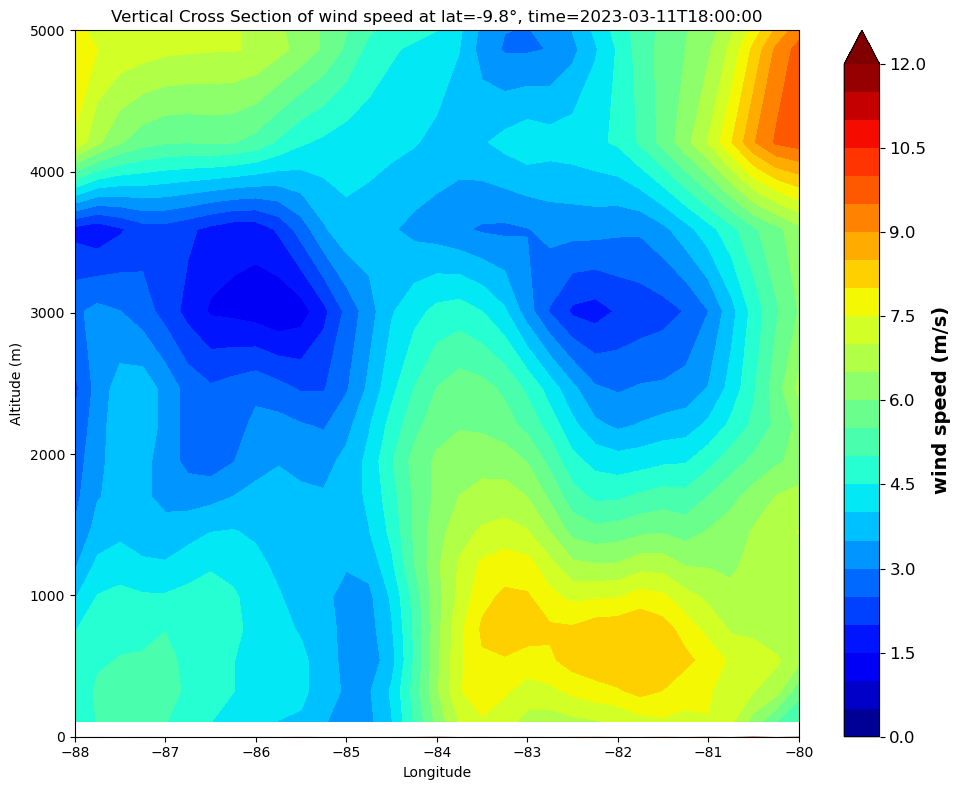

In [45]:


# Plot

val_levels= np.arange(0, 12.4, 0.5)
cmaps=plt.colormaps.get_cmap('jet')

fig = plt.figure(figsize=(10,8))
ax_cross = plt.axes()
val_contours = ax_cross.contourf(ws_section.longitude,
                                 height_levels,
                                 ws_section,
                                 levels=val_levels,
                                 cmap=cmaps,
                                 extend="max")

ht_fill = ax_cross.fill_between(H.longitude, 0, H.z[0], facecolor="sienna")

cbar = fig.colorbar(val_contours, ax=ax_cross)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('wind speed (m/s)', rotation=-270, fontsize=14,weight='bold')
plt.title(f'Vertical Cross Section of wind speed at lat={lat_sel}°, time={str(WS.valid_time[time_idx].values)[:19]}')
plt.xlabel('Longitude')
plt.ylabel('Altitude (m)')
plt.ylim(0, 5000)
plt.xlim(-88, -80)

plt.tight_layout()
plt.show()


## Análisis de OMEGA en el perfil vertical 

In [36]:
filename = '../data/ERA5/ERA5_202303_W_pl.nc'
omega = xr.open_dataset(filename)

filename = '../data/ERA5/ERA5_202303_T_pl.nc'
temp = xr.open_dataset(filename)

In [37]:
# Get pressure level in Pa
pressure = omega['pressure_level'] * 100  # convert hPa to Pa
pressure = pressure.broadcast_like(temp)

In [38]:
# Compute air density
R_d = 287.05  # J/(kg·K)
rho = pressure / (R_d * temp.t)

# Convert omega to w in m/s
g = 9.80665  # m/s²
w_m_per_s = omega / (rho * g)

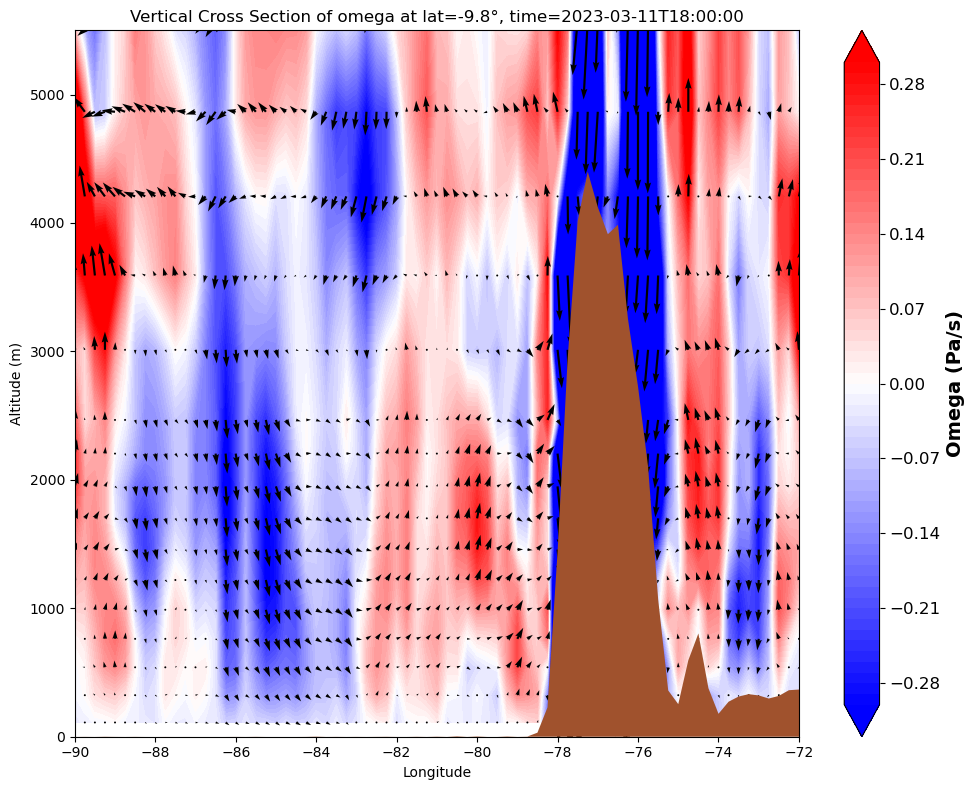

In [46]:
# Selecciona una sección vertical del campo omega (velocidad vertical en Pa/s)
# en la latitud más cercana a 'lat_sel', longitudes entre -90° y -70°, 
# niveles de presión de 1000 a 300 hPa, y para un instante específico de tiempo (time_idx).
W_section = omega.sel(latitude=lat_sel, method='nearest') \
                 .sel(longitude=slice(-90, -70)) \
                 .sel(pressure_level=slice(1000, 500)) \
                 .isel(valid_time=time_idx)

# Selecciona el mismo corte longitudinal y vertical para la componente zonal del viento (u)
u_cross = U.sel(latitude=lat_sel, method='nearest') \
           .sel(longitude=slice(-90, -70)) \
           .sel(pressure_level=slice(1000, 500)) \
           .isel(valid_time=time_idx)

# Selecciona el mismo corte para la componente vertical del viento en m/s (w)
w_cross = w_m_per_s.sel(latitude=lat_sel, method='nearest') \
                   .sel(longitude=slice(-90, -70)) \
                   .sel(pressure_level=slice(1000, 500)) \
                   .isel(valid_time=time_idx)

# Convierte niveles de presión (en hPa) a alturas aproximadas (en metros)
height_levels = pressure_to_height(W_section.pressure_level.values)

# Define niveles para los contornos de omega (de -0.3 a 0.3 Pa/s cada 0.01)
val_levels = np.arange(-0.3, 0.31, 0.01)

# Define el colormap para los contornos (azul-blanco-rojo)
cmaps = plt.colormaps.get_cmap('bwr')

# Crea una figura y eje para el gráfico
fig = plt.figure(figsize=(10, 8))
ax_cross = plt.axes()

# Dibuja contornos rellenos del campo omega (Pa/s) sobre la sección vertical
val_contours = ax_cross.contourf(
    W_section.longitude,
    height_levels,          # eje vertical: altura en metros
    W_section.w,            # campo a graficar: omega
    levels=val_levels,
    cmap=cmaps,
    extend="both"
)

# Agrega una barra de colores con etiqueta
cbar = fig.colorbar(val_contours, ax=ax_cross)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Omega (Pa/s)', rotation=-270, fontsize=14, weight='bold')

# Escala vertical de los vectores (el valor 600 es para visualización)
qv_scale = 1


# Agrega vectores de viento (u horizontal, w vertical) sobre la sección
ax_cross.quiver(
    w_cross.longitude,
    height_levels,
    u_cross.u,           # componente horizontal
    w_cross.w * 400,     # componente vertical (escalada)
    width=0.003
)

# Opcional: rellena topografía del modelo (si tienes variable H.z[0])
ht_fill = ax_cross.fill_between(H.longitude, 0, H.z[0], facecolor="sienna")

# Agrega título, ejes, y límites
plt.title(f'Vertical Cross Section of omega at lat={lat_sel}°, time={str(WS.valid_time[time_idx].values)[:19]}')
plt.xlabel('Longitude')
plt.ylabel('Altitude (m)')
plt.ylim(0, 5500)
plt.xlim(-90, -72)

# Ajusta el diseño y muestra el gráfico
plt.tight_layout()
plt.show()
fig.savefig(f"../fig/OMEGA_20230311.png", dpi = 300, facecolor='w', bbox_inches = 'tight', pad_inches = 0.1)